<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descriptive-vs-Inferential-Statistics" data-toc-modified-id="Descriptive-vs-Inferential-Statistics-1">Descriptive vs Inferential Statistics</a></span></li><li><span><a href="#Data-Types-for-Data-Science" data-toc-modified-id="Data-Types-for-Data-Science-2">Data Types for Data Science</a></span></li><li><span><a href="#Measures-of-Central-Tendency-(1st-Business-Moment)" data-toc-modified-id="Measures-of-Central-Tendency-(1st-Business-Moment)-3">Measures of Central Tendency (1st Business Moment)</a></span></li><li><span><a href="#Measures-of-Dispersion-(2nd-Business-Moment)" data-toc-modified-id="Measures-of-Dispersion-(2nd-Business-Moment)-4">Measures of Dispersion (2nd Business Moment)</a></span></li><li><span><a href="#Plots-for-summarizing-Discrete-vs-Continuous-data" data-toc-modified-id="Plots-for-summarizing-Discrete-vs-Continuous-data-5">Plots for summarizing Discrete vs Continuous data</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-6">Correlation analysis</a></span></li><li><span><a href="#Bivariate/Multivariate-Analysis" data-toc-modified-id="Bivariate/Multivariate-Analysis-7">Bivariate/Multivariate Analysis</a></span></li></ul></div>

## Descriptive vs Inferential Statistics

<b>Descriptive statistics</b>: Summarizing characteristics of a given dataset using various measures like measures of central tendency and measure of dispersion

<b>Inferential statistics</b>: Taking a sample of data to make generalizations about the population. (E.g. Hypothesis testing)

## Data Types for Data Science

Data types in general can be classified into the following:

<b>1. Discrete Data: Data that is either countable (only takes integer values) or finite (specified list of values)</b>
- <b>Count</b>: Numerical data that is countable on integer values only
- <b>Category</b>: Categorical data with labels

Categorical data can be further split into two types:
- <b>Binary class</b>: Categorical data with 2 labels
- <b>Multiple class</b>: Categorical data with more than 2 labels
- &nbsp;&nbsp;&nbsp;&nbsp; <b>Nominal</b>: Categorical data with more than 2 labels that do not have any specified order
- &nbsp;&nbsp;&nbsp;&nbsp; <b>Ordinal</b>: Categorical data with more than 2 labels that do have specified order

<b>2. Continuous Data: Numerical data that is measurable and infinite (in the form of fractions or decimals)</b>
- <b>Interval</b>: Numerical data with relative magnitude information (no true zero value - zero value has meaning)
- <b>Ratio</b>: Numerical data with absolute scale information (with true zero value - zero value has no meaning)

<b>Note that interval data types have certain restrictions on meaningful mathematical operations (addition and subtraction), unlike ratio data types that have no restrictions on mathematical operations allowed</b>

Examples of individual data types:

1. Discrete: Number of children, Count of workers, Number of pages in a book, Colour, Gender, Car brand, blood group, wealth status, class ranking

- Nominal: Colour, Gender, Car brand, Blood group

- Ordinal: Wealth status, Class ranking

- Count: Number of children, Count of workers, Number of pages in a book

2. Continuous: Age, Height, Temperature, Exam marks, Income

- Interval: Income, Temperature

- Ratio: Age, Height, Exam marks



## Measures of Central Tendency (1st Business Moment)

For numerical data, one of the main measures for data exploration is getting an estimate of where most of the data is located (central tendency).

The following are the main measures of central tendency:
1. <b>Mean</b>: Average of list of numerical values
2. <b>Median</b>: Center value from list of numerical values sorted in order
3. <b>Mode</b>: Numerical value with highest frequency

While mean is the most popular measure of central tendency, mean measure is highly sensitive to outliers, such that sometimes other alternatives might be more suitable to reduce influence of outliers.

i) <b>Trimmed mean</b>: Average of numerical values after eliminating outliers (extreme values) for a more robust measure based on threshold

ii) <b>Weighted mean</b>: Average of numerical values based on specified weights, if some values are more variable than others or groups are not equally represented.

iii) <b>Interquartile mean</b>: Average of numerical values after eliminating outliers (extreme values) for a more robust measure based on interquartile range (IQR)

iv) <b>Median</b>: Unlike mean, median only relies on values in the center of sorted data, which makes it a robust measure (<b>less sensitive to outliers</b>)

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as spy

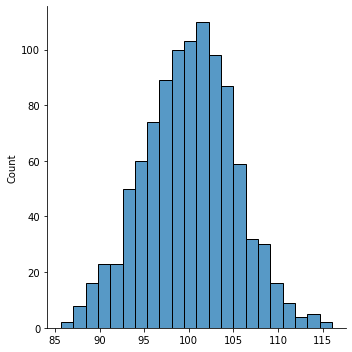

In [2]:
sample = np.random.normal(loc=100, scale=5, size=1000)
sns.displot(sample)

In [3]:
print("Mean of sample:",np.mean(sample))
print("Median of sample:",np.median(sample))
print("Trimmed mean of sample (10% removal):",spy.trim_mean(sample,0.1))

Mean of sample: 100.07253256696465
Median of sample: 100.23923421600307
Trimmed mean of sample (10% removal): 100.08769651453107


In [4]:
# Removing outliers using IQR
IQR = np.percentile(sample,75) - np.percentile(sample,25)
bottom_outlier = np.percentile(sample,25) - 1.5 * IQR
top_outlier = np.percentile(sample,75) + 1.5 * IQR

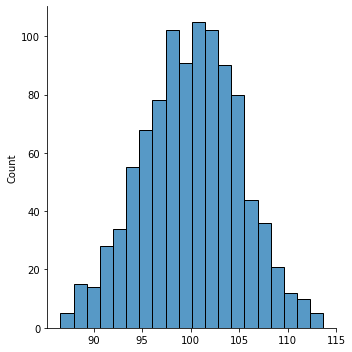

In [5]:
sample_nooutlier = sample[(sample>=bottom_outlier) & (sample<=top_outlier)]
sns.displot(sample_nooutlier)

In [6]:
print("Interquartile mean of sample:",np.mean(sample_nooutlier))
print("Median of sample with no outliers:",np.median(sample_nooutlier))

Interquartile mean of sample: 100.02705512077827
Median of sample with no outliers: 100.19635672217704


In [7]:
print("Difference between mean and interquartile mean:",np.mean(sample)-np.mean(sample_nooutlier))
print("Difference between median of sample and median of sample with no outliers:",np.median(sample)-np.median(sample_nooutlier))

Difference between mean and interquartile mean: 0.04547744618638205
Difference between median of sample and median of sample with no outliers: 0.042877493826026125


From the difference of values above between sample with and without outliers, median is a lot less sensitive to outliers with a much smaller difference, compared to mean.

## Measures of Dispersion (2nd Business Moment)

Besides measure of central tendency, another useful measure for summarizing features is dispersion, which measures whether the data values are tightly clustered or spread out. Variability in features is at the heart of Machine Learning, where variability in features is essential for predictive analytics.

Deviations represent the difference between observed values and the estimate of location.

The following are the main measures of dispersion:

1. <b>Variance</b>: Sum of squared deviations from the mean divided by "sample size - 1"

2. <b>Standard Deviation</b>: Square root of variance

3. <b>Mean absolute deviation</b>: Average of absolute values of deviations from the mean

4. <b>Median absolute deviation</b>: Median of absolute values of deviations from the median

5. <b>Range</b>: Difference between largest and smallest value of dataset

6. <b>Interquartile Range</b>: Difference between 75th and 25th percentile

Standard deviation is usually easier to interpret, compared to variance since standard deviation measure is on the same scale as the original data.

<b>Note that variance, standard deviation and range are highly sensitive to outliers. More robust measures of dispersion are mean absolute deviation, median absolute deviation and interquartile range.</b>

Sometimes, median absolute deviation is multiplied by constant scale factor depending on the distribution type for consistent scale with standard deviation measure. More details about this can be found on the following link: https://en.wikipedia.org/wiki/Median_absolute_deviation

In [8]:
print("Variance of sample:",np.var(sample))
print("Standard deviation of sample:",np.std(sample))
print("Mean absolute deviation of sample:",np.mean(np.absolute(sample - np.mean(sample))))
print("Median absolute deviation of sample:",spy.median_abs_deviation(sample,scale='normal'))
print("Range of sample:",np.max(sample)-np.min(sample))
print("Interquartile range of sample:",spy.iqr(sample))

Variance of sample: 25.981350765541123
Standard deviation of sample: 5.097190477659347
Mean absolute deviation of sample: 4.087949200998146
Median absolute deviation of sample: 5.096449302300424
Range of sample: 30.369314145485674
Interquartile range of sample: 6.906191615564964


In [9]:
print("Variance of sample with no outliers:",np.var(sample_nooutlier))
print("Standard deviation of sample with no outliers:",np.std(sample_nooutlier))
print("Mean absolute deviation of sample with no outliers:",np.mean(np.absolute(sample_nooutlier - np.mean(sample_nooutlier))))
print("Median absolute deviation of sample with no outliers:",spy.median_abs_deviation(sample_nooutlier,scale='normal'))
print("Range of sample with no outliers:",np.max(sample_nooutlier)-np.min(sample_nooutlier))
print("Interquartile range of sample with no outliers:",spy.iqr(sample_nooutlier))

Variance of sample with no outliers: 25.00514268558623
Standard deviation of sample with no outliers: 5.000514242114128
Mean absolute deviation of sample with no outliers: 4.035223202369406
Median absolute deviation of sample with no outliers: 5.0526390275961734
Range of sample with no outliers: 27.106190412738698
Interquartile range of sample with no outliers: 6.869310395425757


In [10]:
print("Difference of variance between sample with and without outliers:",np.var(sample)-np.var(sample_nooutlier))
print("Difference of st.deviation between sample with and without outliers:",np.std(sample)-np.std(sample_nooutlier))
print("Difference of mean abs.dev. between sample with and without outliers:", np.mean(np.absolute(sample - np.mean(sample))) - np.mean(np.absolute(sample_nooutlier - np.mean(sample_nooutlier))))
print("Difference of median abs.dev. between sample with and without outliers:",spy.median_abs_deviation(sample,scale='normal') - spy.median_abs_deviation(sample_nooutlier,scale='normal'))
print("Difference of range between sample with and without outliers:", (np.max(sample)-np.min(sample)) - (np.max(sample_nooutlier)-np.min(sample_nooutlier)))
print("Difference of IQR between sample with and without outliers:",spy.iqr(sample)-spy.iqr(sample_nooutlier))

Difference of variance between sample with and without outliers: 0.976208079954894
Difference of st.deviation between sample with and without outliers: 0.09667623554521931
Difference of mean abs.dev. between sample with and without outliers: 0.05272599862874028
Difference of median abs.dev. between sample with and without outliers: 0.04381027470425014
Difference of range between sample with and without outliers: 3.263123732746976
Difference of IQR between sample with and without outliers: 0.03688122013920747


From the difference of values above between sample with and without outliers, the following measures are in order from most to least sensitive of outliers:

1. Range
2. Variance
3. Stadard Deviation
4. Mean absolute deviation
5. Interquartile Range
6. Median absolute deviation

## Plots for summarizing Discrete vs Continuous data

The following plots below are suitable for summarizing distribution of continuous data:

1. Boxplot/Violinplot/Boxenplot
2. Histogram
3. Kernel Density Estimate (KDE)

The following plots below are suitable for summarizing proportions of discrete data:

1. Barplot/Countplot
2. Pie chart

In [11]:
import pandas as pd
data = pd.read_csv(r'C:\Users\yixia\OneDrive\Desktop\Data Science Notes\Python\Data_sources\Indian_cities.csv')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

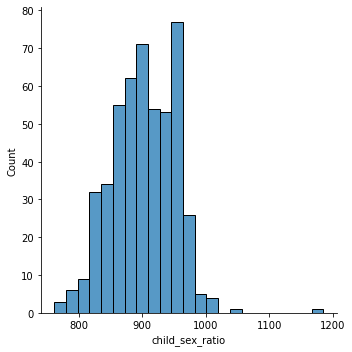

In [13]:
# Histogram plot
sns.displot(x='child_sex_ratio',data = data, kind='hist')

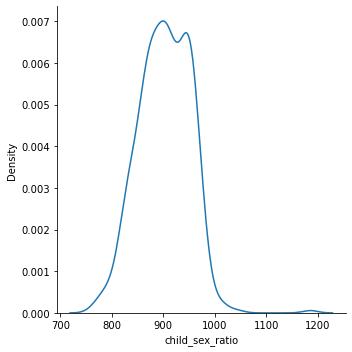

In [14]:
# KDE plot
sns.displot(x='child_sex_ratio',data = data, kind='kde')

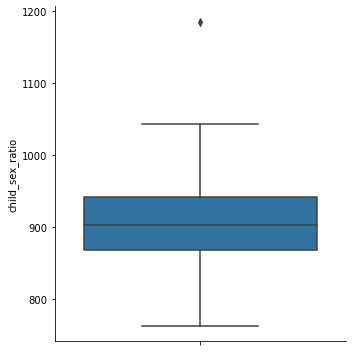

In [15]:
# Box plot
sns.catplot(y='child_sex_ratio',data = data, kind='box')

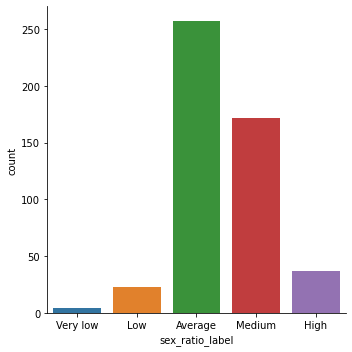

In [16]:
data['sex_ratio_label'] = pd.cut(data['sex_ratio'], bins=5,labels = ['Very low', 'Low', 'Average', 'Medium', 'High'])
# Bar (count) plot
sns.catplot(x='sex_ratio_label', data = data, kind='count')

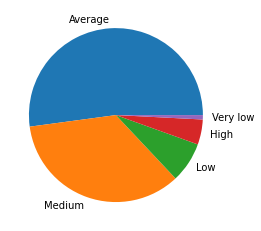

In [17]:
import matplotlib.pyplot as plt
# Pie chart
plt.pie(data['sex_ratio_label'].value_counts(),labels=data['sex_ratio_label'].unique())
plt.show()

## Correlation analysis

Identifying relationships between different numerical variables is part of exploratory data analysis. 

For deriving correlation measure, covariance measure is required, which measures the direction of linear relationships.

Formula for covariance:

<img src='https://afrozhussain.files.wordpress.com/2016/01/covariance.png' width=300, height=75>


Correlation measure helps to identify strength and direction of linear relationships between two variables or between feature and predictor, which will be useful for feature selection.

Formula for correlation: 

<img src='http://zerodha.com/varsity/wp-content/uploads/2017/03/Formula-correlation.png' width=250, height=100>

Correlation value ranges between -1 (perfect negative correlation) and 1 (perfect positive correlation)

For performing correlation analysis, two visualization plots are available:

1. Correlation heatmap 
2. Scatter plot (useful for smaller datasets)

There are three different types of correlation measures:
1. Pearson (Most commmonly used for larger datasets - Not robust to outliers and cannot handle non-linear relationships)
2. Spearman (Most commonly used for smaller datasets - Robust to outliers and can handle non-linear relationships)
3. Kendall (Most commonly used for smaller datasets - Robust to outliers and can handle non-linear relationships)

Although Pearson correlation is the most preferred method, there are several assumptions of Pearson correlation that needs to follow:
1. Linear relationships
2. Normal distribution of data
3. Continuous variables
4. Absence of outliers

For data that does not satisfy any assumption of Pearson correlation, Spearman and Kendall method is preferred.

Note that spearman and kendall's correlation coefficients are based on data ranking, instead of its values and both methods can also accept discrete ordinal variables.

However, kendall's correlation is more robust, compared to spearman's correlation.

Rule of thumb for correlation values (absolute value terms):
- 1: Perfect correlation
- 0.8 to 1: Very strong correlation
- 0.6 to 0.8: Strong correlation
- 0.4 to 0.6: Moderate correlation
- 0.2 to 0.4: Weak correlation
- 0 to 0.2: Very weak correlation

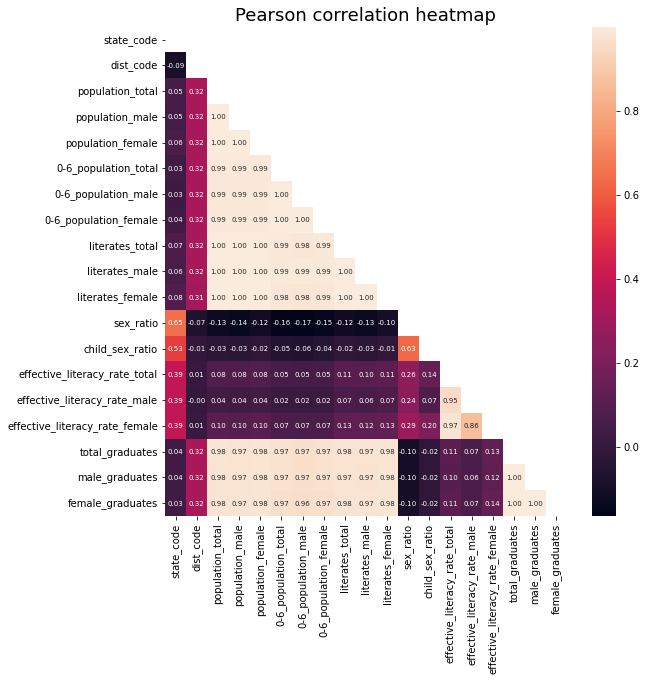

In [18]:
# Pearson correlation heatmap
correlation = data.corr(method='pearson')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':7})
plt.title('Pearson correlation heatmap',size=18)
plt.show()

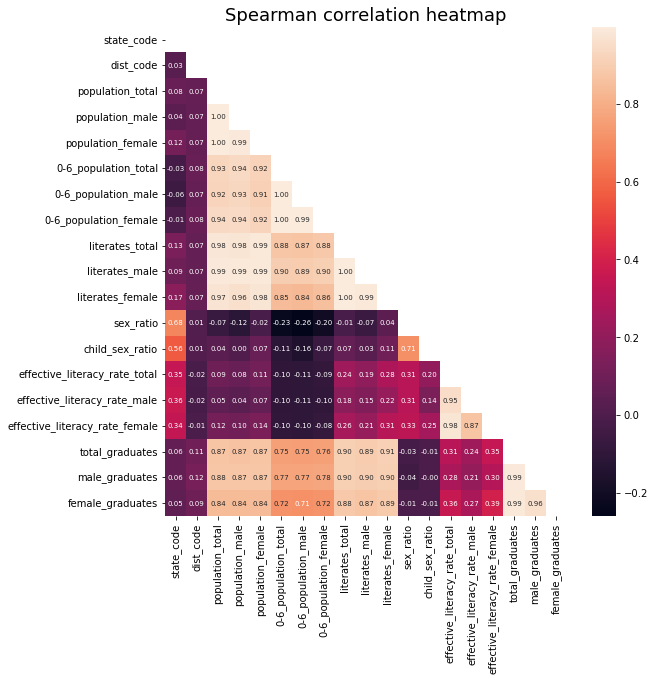

In [19]:
# Spearman correlation heatmap
correlation = data.corr(method='spearman')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':7})
plt.title('Spearman correlation heatmap',size=18)
plt.show()

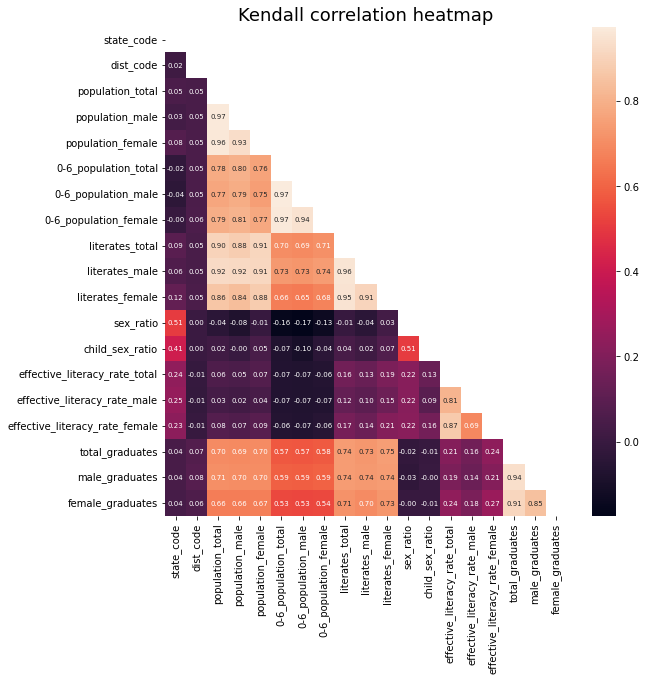

In [20]:
# Kendall correlation heatmap
correlation = data.corr(method='kendall')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':7})
plt.title('Kendall correlation heatmap',size=18)
plt.show()

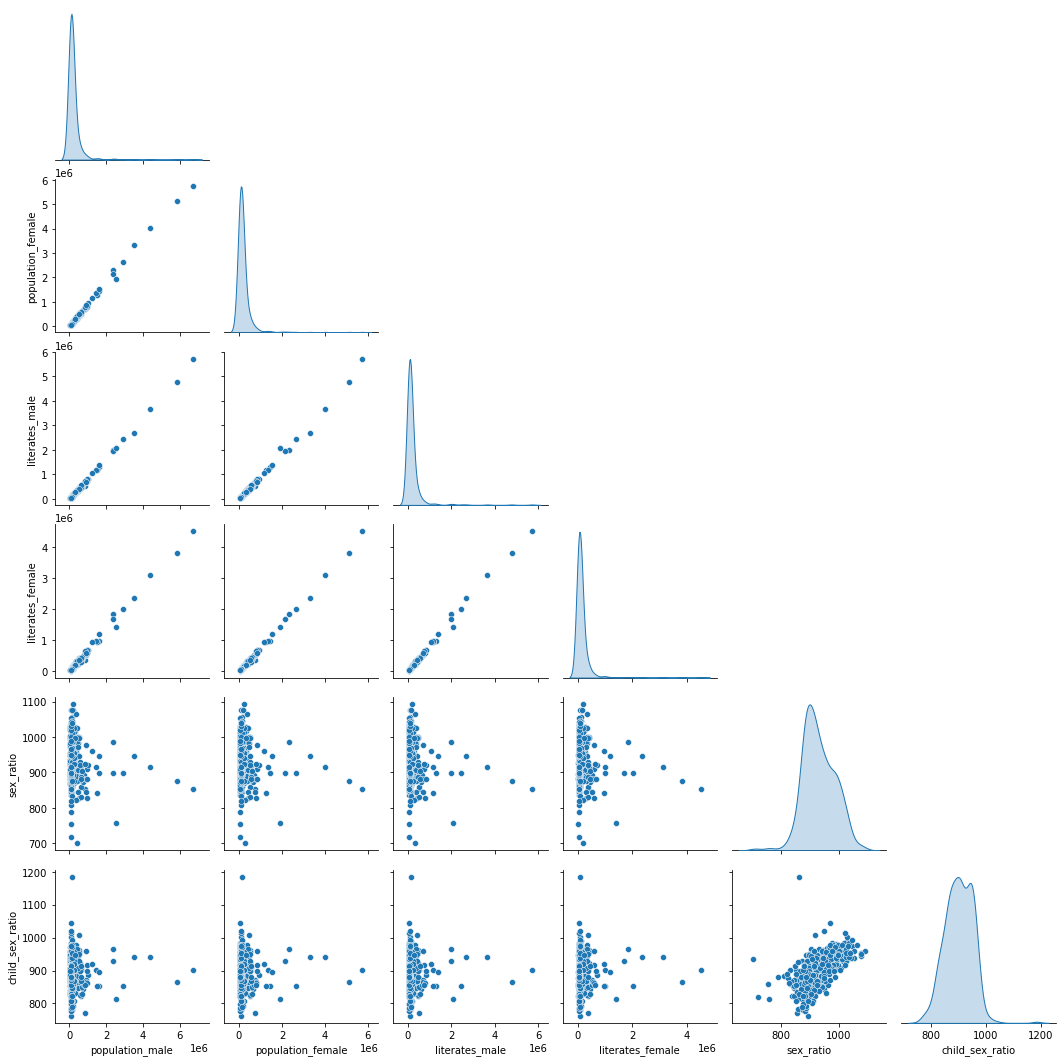

In [21]:
# Pairplot for correlation (scatterplot) and distribution (kde) analysis
subset = data.iloc[:,[5,6,11,12,13,14]]
sns.pairplot(subset, corner=True, diag_kind='kde')

## Bivariate/Multivariate Analysis

Bivariate/multivariate analysis involves analyzing relationship between two or more variables.

The following plots can be used for multivariate analysis:

1. Scatter plot (Between two numerical variables for smaller dataset)
2. Hexagonal plot (Between two numerical variables for larger dataset, alternative to histogram)
3. Contour plot (Between two numerical variables for larger dataset, alternative to kde)
4. Contigency table (Between two categorical variables)
5. Boxplot/Violinplot/Boxenplot (Between numerical and categorical variables)

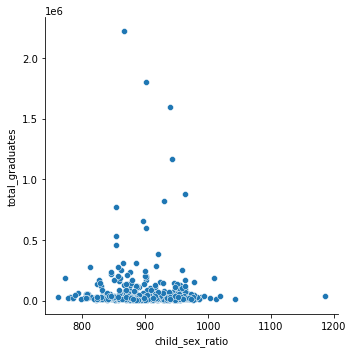

In [22]:
# Individual scatterplot
sns.relplot(x='child_sex_ratio', y='total_graduates', data=data, kind='scatter')

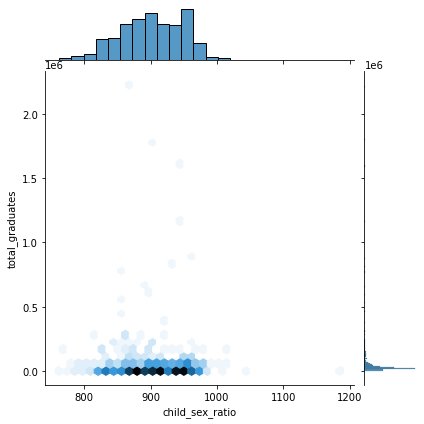

In [23]:
# Hexagonal bin plot
sns.jointplot(x='child_sex_ratio', y='total_graduates', data=data,kind='hex')

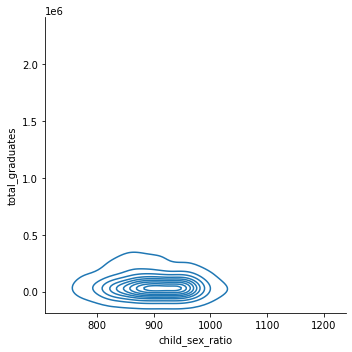

In [24]:
# Contour plot (KDE)
sns.displot(x='child_sex_ratio', y='total_graduates', data=data,kind='kde')

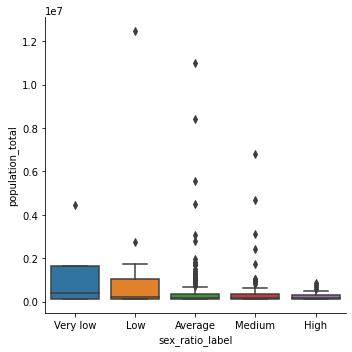

In [25]:
# Violin plot
sns.catplot(x='sex_ratio_label', y='population_total', data=data, kind='box')

In [26]:
# Contingency table
pd.crosstab(index=data['state_name'],columns=data['sex_ratio_label'])

sex_ratio_label,Very low,Low,Average,Medium,High
state_name,,,,,
ANDAMAN & NICOBAR ISLANDS,0,0,1,0,0
ANDHRA PRADESH,0,0,1,28,13
ASSAM,0,0,2,2,0
BIHAR,0,1,25,0,0
CHANDIGARH,0,1,0,0,0
CHHATTISGARH,0,0,2,7,0
GUJARAT,1,0,21,7,0
HARYANA,0,4,16,0,0
HIMACHAL PRADESH,0,1,0,0,0
